#### 正多边形

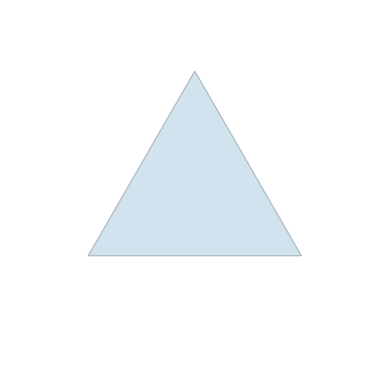

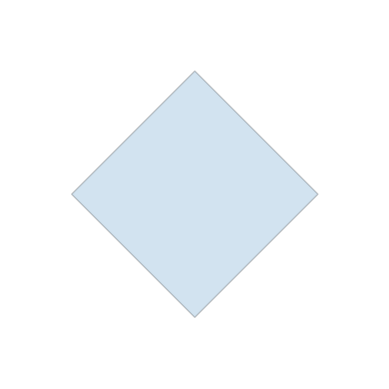

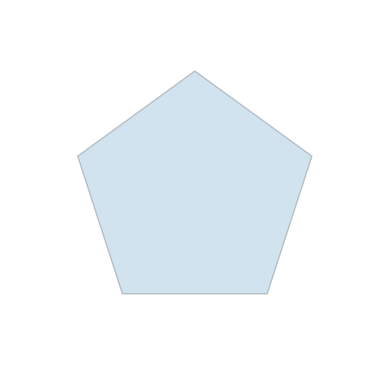

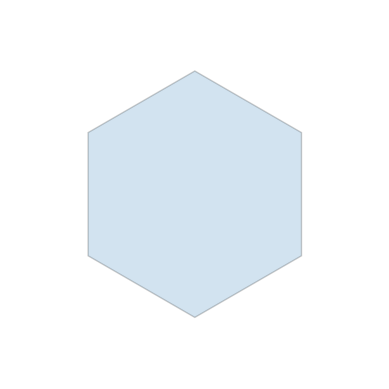

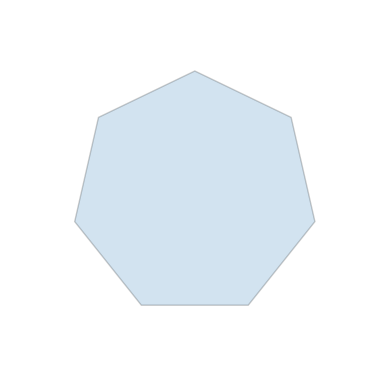

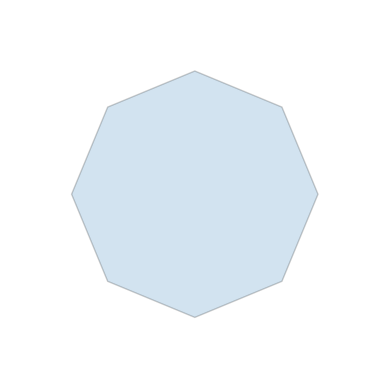

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Circle
import numpy as np

for num_vertices in [3,4,5,6,7,8]:
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    
    # matplotlib.patches.RegularPolygon() 函数创建正多边形图形
    hexagon_inner = RegularPolygon((0,0), numVertices=num_vertices, radius=1, alpha=0.2, edgecolor='k')
    
    # add_patch() 方法用于将图形元素添加到轴中。
    ax.add_patch(hexagon_inner)
    
    plt.axis('off')
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.show()

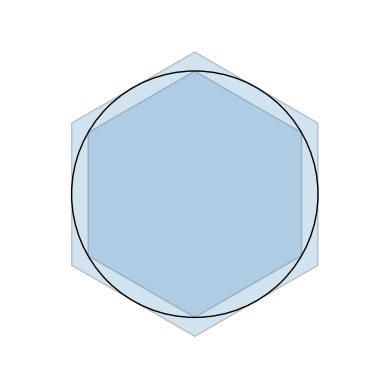

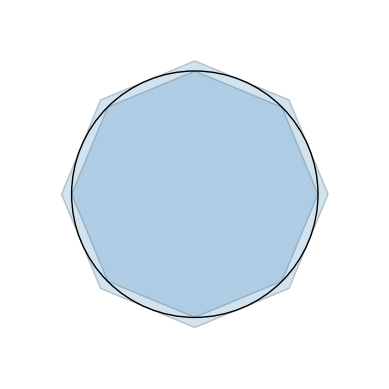

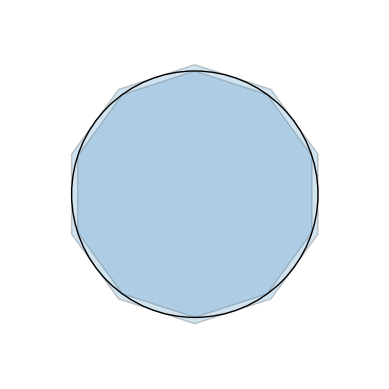

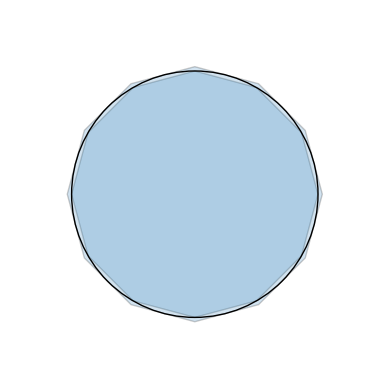

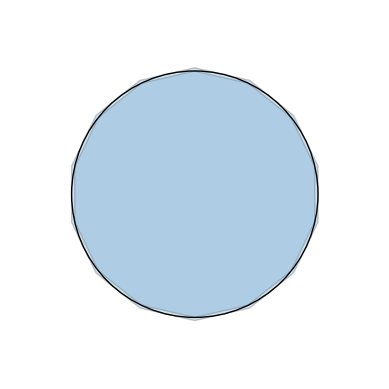

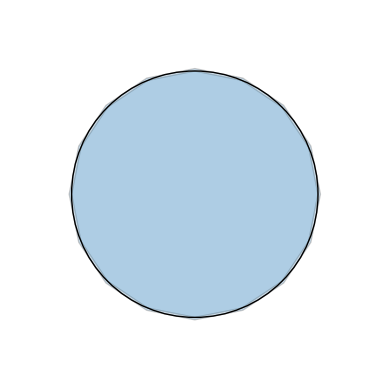

In [2]:
for num_vertices in [6,8,10,12,14,16]:
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    
    hexagon_inner = RegularPolygon((0,0), numVertices=num_vertices, 
                                   radius=1, alpha=0.2, edgecolor='k')
    ax.add_patch(hexagon_inner)
    
    hexagon_outer = RegularPolygon((0,0), numVertices=num_vertices, 
                                   radius=1/np.cos(np.pi/num_vertices), 
                                   alpha=0.2, edgecolor='k')
    ax.add_patch(hexagon_outer)
    
    circle = Circle((0,0), radius=1, facecolor = 'none', edgecolor='k')
    ax.add_patch(circle)
    
    plt.axis('off')
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.show()

#### 估算圆周率

Text(45.347222222222214, 0.5, 'Estimate of $\\pi$')

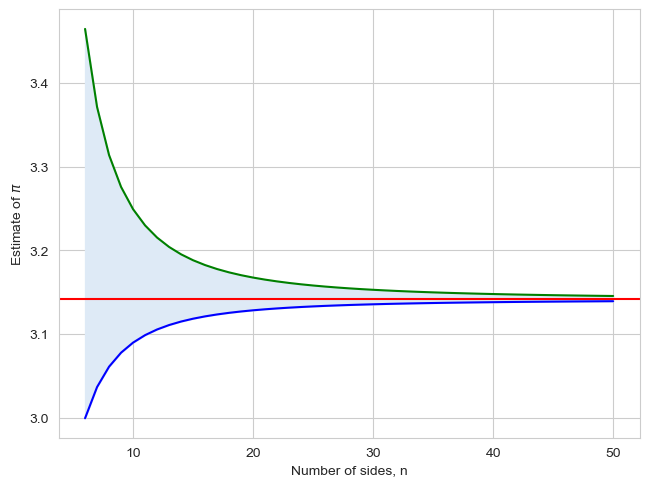

In [3]:
n_start = 6
n_stop  = 50
n_array = np.linspace(n_start,n_stop,n_stop-n_start + 1)

pi_lower_b = np.sin(np.pi/n_array)*n_array
pi_upper_b = np.tan(np.pi/n_array)*n_array

fig, ax = plt.subplots()

plt.axhline(y=np.pi, color='r', linestyle='-')
plt.plot(n_array, pi_lower_b, color = 'b')
plt.plot(n_array, pi_upper_b, color = 'g')
plt.fill_between(n_array, pi_lower_b, pi_upper_b, color = '#DEEAF6')
plt.tight_layout()
plt.xlabel('Number of sides, n')
plt.ylabel('Estimate of $\pi$')

Text(45.347222222222214, 0.5, 'Estimate of $\\pi$')

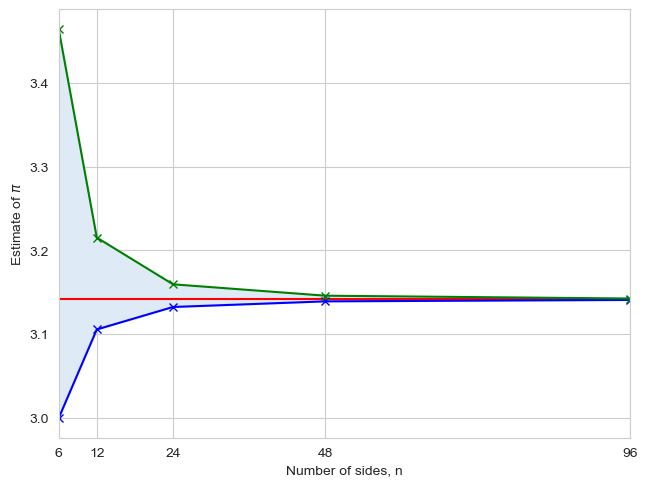

In [4]:
n_start = 6

B_6 = np.sin(np.pi/n_start)*n_start
A_6 = np.tan(np.pi/n_start)*n_start

B_array = []
A_array = []
n_array = [6,12,24,48,96]

B_i = B_6
A_i = A_6
n_i = n_start

for i in n_array:
    
    B_array.append(B_i)
    A_array.append(A_i)
    
    # updating
    A_i = 2*A_i*B_i/(A_i + B_i)
    B_i = np.sqrt(A_i*B_i)

B_array = np.array(B_array)
A_array = np.array(A_array)
n_array = np.array(n_array)

fig, ax = plt.subplots()

plt.axhline(y=np.pi, color='r', linestyle='-')
plt.plot(n_array,B_array, color = 'b', marker = 'x')
plt.plot(n_array,A_array, color = 'g', marker = 'x')
plt.fill_between(n_array, B_array, A_array, color = '#DEEAF6')
plt.tight_layout()
plt.xticks([6,12,24,48,96])
plt.xlim((6,96))
plt.xlabel('Number of sides, n')
plt.ylabel('Estimate of $\pi$')